In [13]:
import cv2
import numpy as np
from retinaface import RetinaFace
from matplotlib import pyplot as plt  
import os

In [2]:
def convolution2d(image, kernel):  
    kernel_height, kernel_width = kernel.shape  
    img_height, img_width = image.shape  

    pad_height = kernel_height // 2  
    pad_width = kernel_width // 2  
 
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')  
    output = np.zeros_like(image)  
 
    for i in range(img_height):  
        for j in range(img_width):   
            region = padded_image[i:i + kernel_height, j:j + kernel_width]  
            output[i, j] = np.sum(region * kernel)  
    output = np.clip(output, 0, 255).astype(np.uint8)  
    return output  

identity_kernel = np.array([[0, 0, 0],  
                             [0, 1, 0],  
                             [0, 0, 0]])  

left_sobel_kernel = np.array([[-1, 0, 1],  
                               [-2, 0, 2],  
                               [-1, 0, 1]])  

blur_kernel = np.array([[1/2, 1/2, 1/2],  
                        [1/2, 1/2, 1/2],  
                        [1/2, 1/2, 1/2]])  

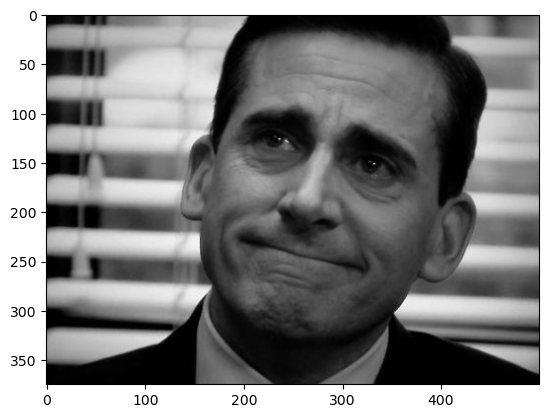

In [3]:
image = cv2.imread('D:/downlodsp/crying.jpg', cv2.IMREAD_GRAYSCALE)  
plt.imshow(image , cmap='gray')

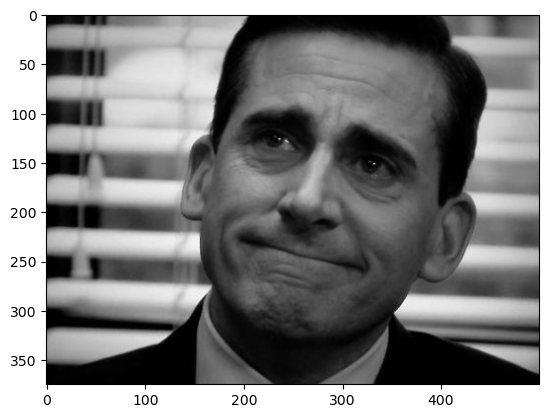

In [4]:
identity_result = convolution2d(image, identity_kernel)  
left_sobel_result = convolution2d(image, left_sobel_kernel)  
blur_result = convolution2d(image, blur_kernel) 

plt.imshow(identity_result, cmap='gray')  

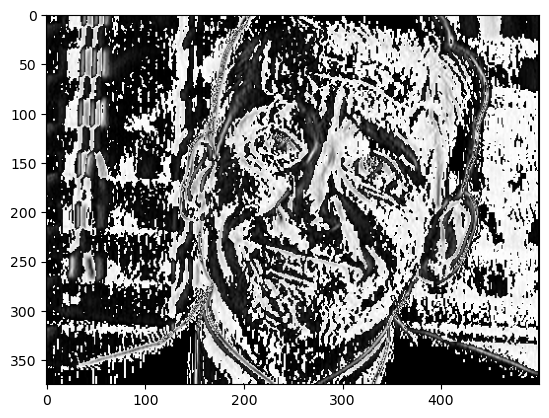

In [5]:
plt.imshow(left_sobel_result, cmap='gray')  


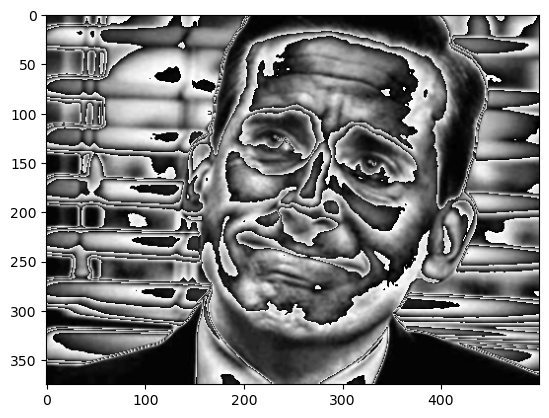

In [9]:
plt.imshow(blur_result, cmap='gray')  

In [52]:
resp = RetinaFace.detect_faces("D:/downlodsp/images.jpeg")
resp

{'face_1': {'score': 0.9993044137954712,
  'facial_area': [57, 67, 155, 200],
  'landmarks': {'right_eye': [82.62313, 119.0966],
   'left_eye': [130.75737, 119.10771],
   'nose': [107.26752, 151.67638],
   'mouth_right': [89.35971, 172.10088],
   'mouth_left': [124.04573, 171.91681]}}}